<a href="https://colab.research.google.com/github/AntonLedyaev/numeric_methods/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ледяев Антон 19.Б02-пу

In [ ]:
%matplotlib
import math as m
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
n = 8

Using matplotlib backend: agg


##Функция

In [ ]:
def f(x):
    return np.tan(x) - np.cos(x) + 0.1

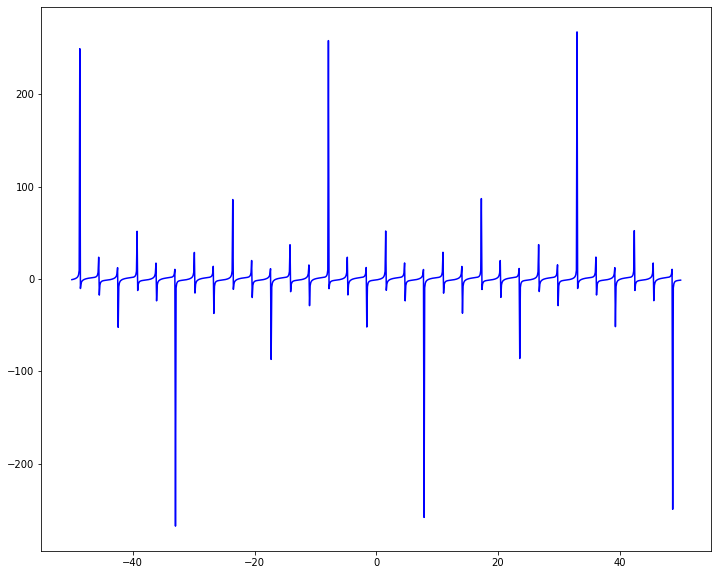

In [ ]:
x_test = np.linspace(-50,50,num = 1000)
y_test = f(x_test)
fig, ax = plt.subplots()
ax.plot(x_test,y_test, 'b', label = 'test function', linewidth=1.5)
fig.set_size_inches(12, 10)

In [ ]:
a = -np.pi/2+0.1
b = np.pi/2-0.1
z = (b - a)/n

In [ ]:
x = np.linspace(a, b, num = 100)
y = [f(i) for i in x]

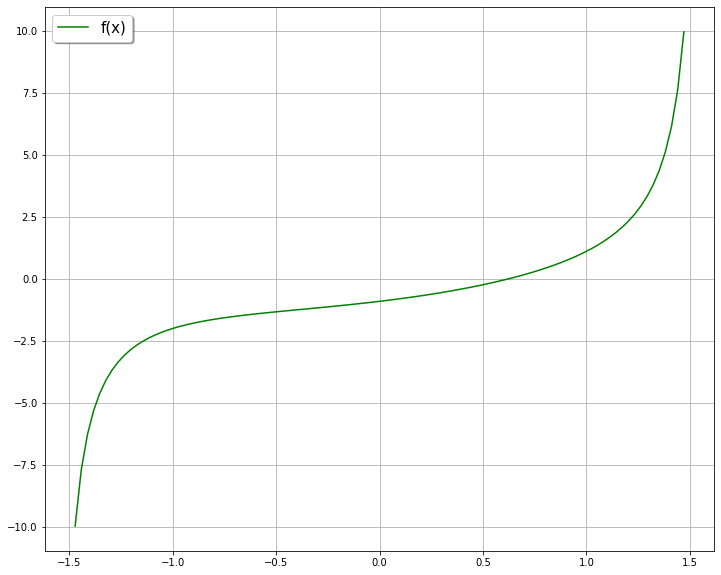

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, label = 'f(x)', c = 'green')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)

###Равномерное распределение узлов

In [ ]:
x_even = np.linspace(a, b, n)
y_even = [f(i) for i in x_even]

###Распределение узлов по Чебышеву

In [ ]:
def chebyshev(i):
    return (1/2)*((b-a)*m.cos(((2*i+1)/(2*(n+1)))*m.pi) + (b + a))

In [ ]:
x_cheb = [chebyshev(i) for i in range(0, n)]
x_cheb = [i for i in x_cheb[::-1]]
y_cheb = [f(i) for i in x_cheb]

##Полином Лагранжа

In [ ]:
def l_k(x, k, nodes):
    upper = 1
    lower = 1
    for i in range (0,n):
        if i == k:
            continue
        upper *= (x - nodes[i])
        lower *= (nodes[k]- nodes[i])
    return (upper/lower)

def Lagrange(x, nodes):
    Pn = 0
    for i in range(0,n):
        Pn += l_k(x, i, nodes)*f(nodes[i])
    return Pn

In [ ]:
y_cheb_lagrange = [Lagrange(i, x_cheb) for i in x]
y_even_lagrange = [Lagrange(i, x_even) for i in x]

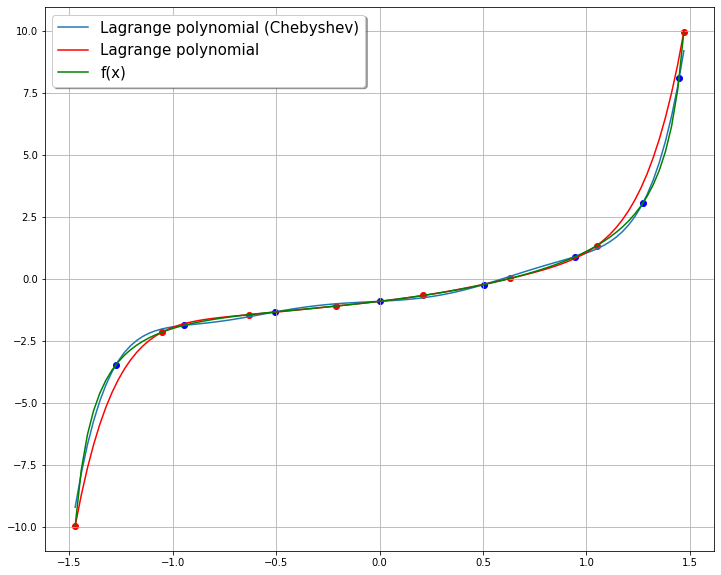

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y_cheb_lagrange, label = 'Lagrange polynomial (Chebyshev)')
ax.plot(x, y_even_lagrange, c = 'red', label = 'Lagrange polynomial')
ax.plot(x, y, c = 'green', label = 'f(x)')
ax.scatter(x_cheb, y_cheb, c = 'blue')
ax.scatter(x_even, y_even, c = 'red')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)

###Полином Ньютона

In [ ]:
def w_k_i(x, degree, nodes, k):
    result = 1
    for i in range(0, degree):
        if i == k:
            continue
        result *= (x - nodes[i])
    return result

def A_i(degree, nodes):
    result = 0
    degree+=1
    for i in range(0, degree):
        result += f(nodes[i])/w_k_i(nodes[i], degree, nodes, i)
    return result

def Newton(x, nodes):
    result = 0
    for i in range(0,n):
        result += A_i(i,nodes)*w_k_i(x, i, nodes, -1)
    return result

In [ ]:
y_cheb_newton = [Newton(i, x_cheb) for i in x]
y_even_newton = [Newton(i, x_even) for i in x]

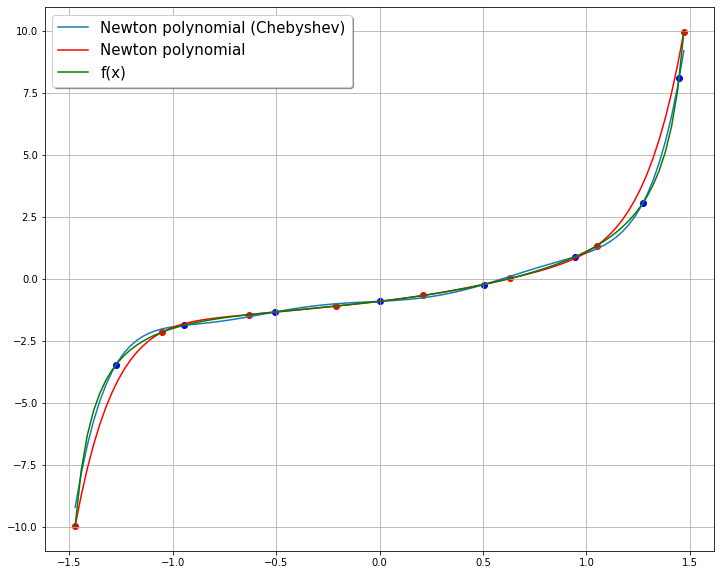

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y_cheb_newton, label = 'Newton polynomial (Chebyshev)')
ax.plot(x, y_even_newton, c = 'red', label = 'Newton polynomial')
ax.plot(x, y, c = 'green', label = 'f(x)')
ax.scatter(x_cheb, y_cheb, c = 'blue')
ax.scatter(x_even, y_even, c = 'red')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)

###Погрешность

In [ ]:
def absolute_error(f, f_new):
    if f - f_new != 0:
        return -np.log10(np.absolute(f - f_new))

In [ ]:
chebyshev_absolute_error = [absolute_error(f(i), Lagrange(i, y_cheb)) for i in x]
even_absolute_error = [absolute_error(f(i), Lagrange(i, y_even)) for i in x]

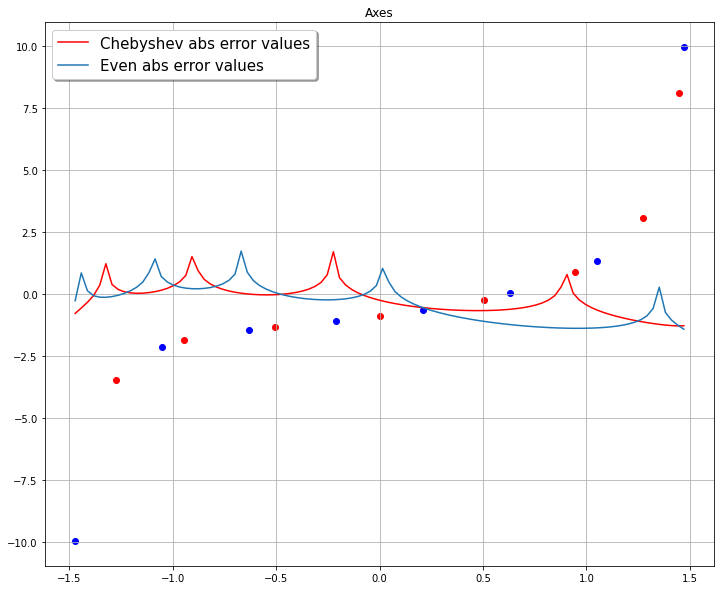

In [ ]:
fig, ax = plt.subplots()
ax.set(title='Axes')
ax.plot(x, chebyshev_absolute_error, c ='r', label = 'Chebyshev abs error values')
ax.plot(x, even_absolute_error, label = 'Even abs error values')
ax.scatter(x_cheb, y_cheb, c = 'red')
ax.scatter(x_even, y_even, c = 'blue')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 10)